In [3]:
import pandas as pd
data = pd.read_excel("Completed_data1.xlsx")
data=data.drop(columns="医生上肢评分",axis=1)
data=data.drop(columns="医师下肢评分",axis=1)
data=data.drop(columns="Task",axis=1)
df = pd.DataFrame(data)
x=df.iloc[:,:32]
y=df["医生总评分"]
x.head()

,上肢动作3,上肢动作4,上肢动作5,上肢动作6,上肢动作7,上肢动作8,上肢动作9,上肢动作10,上肢动作11,上肢动作12,...,上肢动作27,上肢动作28,上肢动作29,上肢动作30,上肢动作合1,下肢动作10,下肢动作11,下肢动作12,下肢动作13,上肢动作合2
0,1,0,1,0,0,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,2,1,2,2,1,2,1,...,0,0,0,0,0,0,0,2,0,6
2,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,2,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,2,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [4]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor as XGBR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LassoCV

In [5]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3)#找到最优参数
Kernel = ["linear","rbf","sigmoid","poly"]
for kernel in Kernel:
    clf= SVR(kernel = kernel
             , gamma="auto"
             , degree = 1
             , cache_size=5000
           )
    print("The accuracy under kernel %s is %f" % (kernel,cross_val_score(clf,x,y,cv=10,scoring="r2").mean()))
svm_poly = SVR(kernel="poly", degree=1, C=10, epsilon=0.1, gamma="scale").fit(Xtrain,Ytrain)
print("The accuracy under kernel %s is %f" % ('poly',cross_val_score(svm_poly,x,y,cv=10,scoring="r2").mean()))

The accuracy under kernel linear is 0.934845
The accuracy under kernel rbf is 0.882359
The accuracy under kernel sigmoid is -0.029055
The accuracy under kernel poly is 0.941359
The accuracy under kernel poly is 0.938688


0.9285813597436968 51


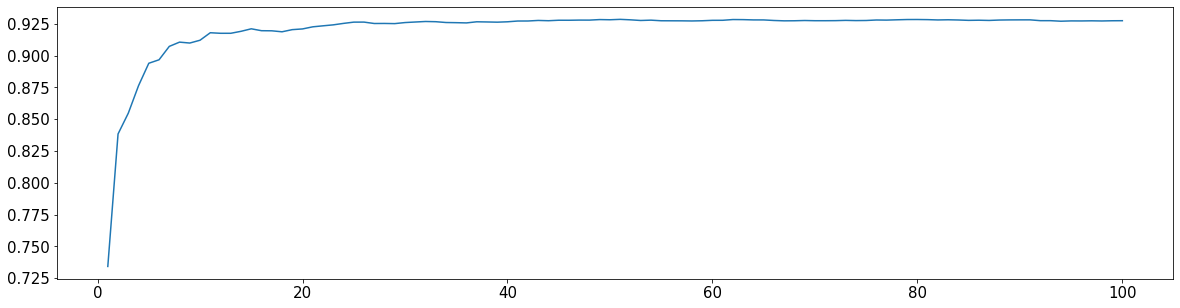

In [142]:
from sklearn.model_selection import cross_val_score
superpa = []
for i in range(100):
    rfc = RandomForestRegressor(n_estimators=i+1,random_state=0)
    rfc_s = cross_val_score(rfc,x,y,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa))+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,101),superpa)
plt.show()

In [143]:
import numpy as np
from sklearn.metrics import r2_score
# n=3 # how many times to shuffle the training data
nhn_range=[130,160,190,220,250,280]# number of hidden neurons
best_r = 0  # 最高准确率
best_h = 0  # 最佳k值
for i in nhn_range:
    mlp = MLPRegressor(hidden_layer_sizes=i,random_state=0)
    re=cross_val_score(mlp,x,y,cv=10).mean()
    if re > best_r:
        best_r = re
        best_h = i
print('最佳准确率为：', best_r)
print('最佳hidden_layer_sizes值为：', best_h)

D:\Program Files\Python38\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\Python38\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\Python38\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\Python38\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\Python38\Lib\site-packages\sklearn\neural_network\_

最佳准确率为： 0.926291705130595
最佳hidden_layer_sizes值为： 160


In [144]:
ridge = RidgeCV()
rfR = RandomForestRegressor(n_estimators=78,random_state=0)
svm_R = SVR(kernel="poly", degree=1, C=10, epsilon=0.1, gamma="scale")
reg = XGBR(n_estimators=90,max_depth=3,learning_rate=0.08,subsample=0.90,colsample_bytree=0.9,min_child_weight=5)
mlp = MLPRegressor(hidden_layer_sizes=160,random_state=0)
lasso = LassoCV()

In [145]:
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
n=10
ridge_p=cross_val_predict(ridge,x,y,cv=n)
rfR_p=cross_val_predict(rfR,x,y,cv=n)
svmR_p=cross_val_predict(svm_R,x,y,cv=n)
mlp_p=cross_val_predict(mlp,x,y,cv=n)
xbg_r_p=cross_val_predict(reg,x,y,cv=n)
lasso_p=cross_val_predict(lasso,x,y,cv=n)
ridge_p=np.clip(ridge_p,0,100)
rfR_p=np.clip(rfR_p,0,100)
svmR_p=np.clip(svmR_p,0,100)
mlp_p=np.clip(mlp_p,0,100)
xbg_r_p=np.clip(xbg_r_p,0,100)
lasso_p=np.clip(lasso_p,0,100)

r_c=ridge_p.copy()
rf_c=rfR_p.copy()
svm_c=svmR_p.copy()
mlp_c=mlp_p.copy()
xbg_c=xbg_r_p.copy()
lasso_c=lasso_p.copy()
mape=[1,1,1,1,1,1]
mae=[1,1,1,1,1,1]
mse=[1,1,1,1,1,1]
rmse=[1,1,1,1,1,1]
r2=[1,1,1,1,1,1]
list1=[svmR_p,rfR_p,xbg_r_p,lasso_p,ridge_p,mlp_p]
a=np.mean(np.abs(y-ridge_p)/y)
for i in range(6):
    mape[i] = np.mean(np.abs((y - list1[i])/y))
    mae[i] = mean_absolute_error(y,list1[i])
    mse[i] = mean_squared_error(y,list1[i])
    rmse[i]=sqrt(mean_squared_error(y,list1[i]))
    r2[i] = r2_score(y,list1[i])
nums = [mae,mape,mse,rmse,r2]
colu = ["svm_R","rfR","xbg","lasso","mlp","ridge"] 
inde = ["MAE（平均绝对误差）","MAPE（平均绝对百分比误差）","MSE（均方误差）","RMSE（均方根误差）","R Square（R方）"] 
table_s=pd.DataFrame(data=nums,columns=colu,index=inde)
table_s.T


D:\Program Files\Python38\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\Python38\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\Python38\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\Python38\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\Python38\Lib\site-packages\sklearn\neural_network\_

,MAE（平均绝对误差）,MAPE（平均绝对百分比误差）,MSE（均方误差）,RMSE（均方根误差）,R Square（R方）
svm_R,4.546536,0.138875,39.492084,6.284273,0.947149
rfR,5.291417,0.161999,47.780389,6.912336,0.936057
xbg,5.395223,0.161082,50.811739,7.128235,0.932000
lasso,4.910031,0.147219,41.912435,6.473981,0.943910
mlp,4.818811,0.142889,40.778837,6.385831,0.945427
ridge,4.994821,0.160471,44.101419,6.640890,0.940980


In [146]:
from scipy import stats
def get_p_value(arrA, arrB):
    a = np.array(arrA)
    b = np.array(arrB)
    t, p = stats.ttest_ind(a,b)
    return p
p=[1,1,1,1,1,1]
for i in range(6):
    p[i]=get_p_value(list1[i],y)
colu = ["P值"] 
inde = ["ridge","rf","svm","mlp","xbg","lasso"] 
table5=pd.DataFrame(data=p,columns=colu,index=inde)
table5

,P值
ridge,0.845937
rf,0.921730
svm,0.893648
mlp,0.997459
xbg,0.988387
lasso,0.586361


In [147]:
# from sklearn.metrics import mean_absolute_error
# mae=[1,1,1,1,1,1]
# ypred=[ridge_p,rfR_p,svmR_p,mlp_p,xbg_r_p,lasso_p]
# for i in range(6):
#     mae[i] = np.abs(y-ypred[i])
# label=["ridge","rf","svm","mlp","xbg","lasso"]
# plt.boxplot(mae,
#             medianprops={'color': 'red', 'linewidth': '1.5'},
#             meanline=True,
#             showmeans=True,
#             meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
#             flierprops={"marker": "+", "markerfacecolor": "r", "markersize": 4},
#             labels=label
#             )
# plt.title("Boxplot")
# plt.ylabel("Error")
# plt.savefig('Boxplot.png',dpi=600)

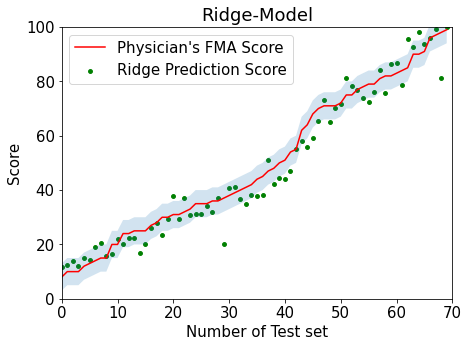

In [184]:
y_=y.iloc[162:232].copy()
y_.index = range(y_.shape[0])

index=np.argsort(y_.to_numpy())
index
a=y_.to_numpy()[index]
ridge_p_=ridge_p[162:232].copy()
r_c=ridge_p_.copy()
for i in range(len(y_)):    
    ridge_p_[i] = r_c[index[i]]
plt.figure(figsize=[7,5])
plt.rcParams.update({'font.size': 15})     #设置图例字体大小
plt.plot(range(len(y_)),a,c='r',label="Physician's FMA Score")
plt.scatter(range(len(y_)),ridge_p_,s=15,c='g',label='Ridge Prediction Score')
plt.fill_between(range(len(y_)), a-5, a+5,alpha=0.2)
plt.legend()
plt.title("Ridge-Model")
plt.xlabel("Number of Test set",fontsize=15)
plt.ylabel("Score",fontsize=15)
plt.axis([0,70,0,100])
plt.savefig('Ridge-Model.png',dpi=600)


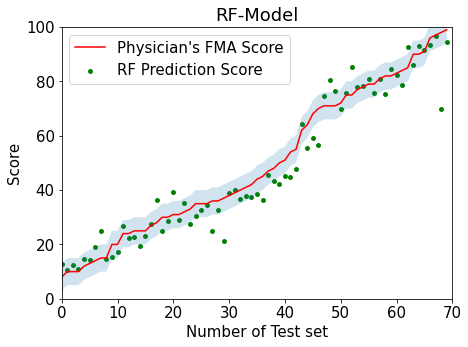

In [185]:
index=np.argsort(y_.to_numpy())
a=y_.to_numpy()[index]
rfR_p_=rfR_p[162:232].copy()
rf_c=rfR_p_.copy()
for i in range(len(ridge_p_)):    
    rfR_p_[i] = rf_c[index[i]]
plt.figure(figsize=[7,5])
plt.rcParams.update({'font.size': 15})     #设置图例字体大小
plt.plot(range(len(y_)),a,c='r',label="Physician's FMA Score")
plt.scatter(range(len(y_)),rfR_p_,s=15,c='g',label='RF Prediction Score')
plt.fill_between(range(len(y_)), a-5, a+5,alpha=0.2)
plt.legend()
plt.title("RF-Model")
plt.xlabel("Number of Test set",fontsize=15)
plt.ylabel("Score",fontsize=15)
plt.axis([0,70,0,100])
plt.savefig('RF-Model.png',dpi=600)

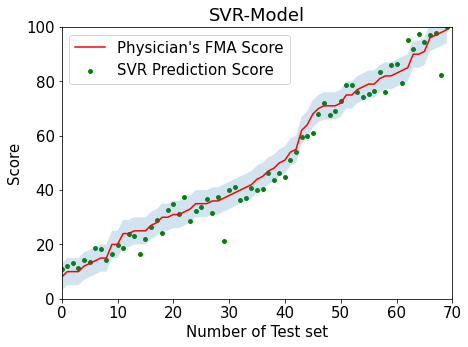

In [186]:
index=np.argsort(y_.to_numpy())
svmR_p_=svmR_p[162:232].copy()
svm_c=svmR_p_.copy()
for i in range(len(ridge_p_)):    
    svmR_p_[i] = svm_c[index[i]]
plt.figure(figsize=[7,5])
plt.rcParams.update({'font.size': 15})     #设置图例字体大小
plt.plot(range(len(y_)),a,c='r',label="Physician's FMA Score")
plt.scatter(range(len(y_)), svmR_p_,s=15,c='g',label='SVR Prediction Score')
plt.fill_between(range(len(y_)), a-5, a+5,alpha=0.2)
plt.legend()
plt.title("SVR-Model")
plt.xlabel("Number of Test set",fontsize=15)
plt.ylabel("Score",fontsize=15)
plt.axis([0,70,0,100])
plt.savefig('SVR-Model.png',dpi=600)

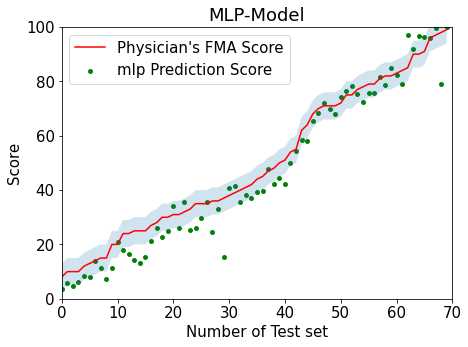

In [187]:
mlp_p_=mlp_p[162:232].copy()
mlp_c=mlp_p_.copy()
for i in range(len(ridge_p_)):    
    mlp_p_[i] = mlp_c[index[i]]
plt.figure(figsize=[7,5])
plt.rcParams.update({'font.size': 15})     #设置图例字体大小
plt.plot(range(len(y_)),a,c='r',label="Physician's FMA Score")
plt.scatter(range(len(y_)), mlp_p_,s=15,c='g',label='mlp Prediction Score')
plt.fill_between(range(len(y_)), a-5, a+5,alpha=0.2)
plt.legend()
plt.title("MLP-Model")
plt.xlabel("Number of Test set",fontsize=15)
plt.ylabel("Score",fontsize=15)
plt.axis([0,70,0,100])
plt.savefig('MLP-Model.png',dpi=600)

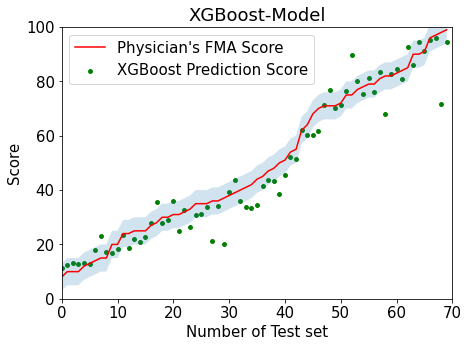

In [188]:
xbg_r_p_=xbg_r_p[162:232].copy()
xbg_c=xbg_r_p_.copy()
for i in range(len(ridge_p_)):    
    xbg_r_p_[i] = xbg_c[index[i]]
plt.figure(figsize=[7,5])
plt.rcParams.update({'font.size': 15})     #设置图例字体大小
plt.plot(range(len(y_)),a,c='r',label="Physician's FMA Score")
plt.scatter(range(len(y_)), xbg_r_p_,s=15,c='g',label='XGBoost Prediction Score')
plt.fill_between(range(len(y_)), a-5, a+5,alpha=0.2)
plt.legend()
plt.title("XGBoost-Model")
plt.xlabel("Number of Test set",fontsize=15)
plt.ylabel("Score",fontsize=15)
plt.axis([0,70,0,100])
plt.savefig('XGBoost-Model.png',dpi=600)

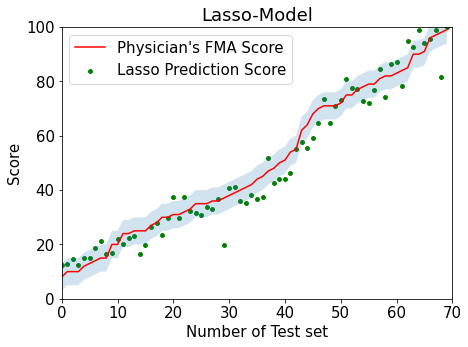

In [189]:
lasso_p_=lasso_p[162:232].copy()
lasso_c=lasso_p_.copy()
for i in range(len(ridge_p_)):    
    lasso_p_[i] = lasso_c[index[i]]
plt.figure(figsize=[7,5])
plt.rcParams.update({'font.size': 15})     #设置图例字体大小
plt.plot(range(len(y_)),a,c='r',label="Physician's FMA Score")
plt.scatter(range(len(y_)),lasso_p_,s=15,c='g',label='Lasso Prediction Score')
plt.fill_between(range(len(y_)), a-5, a+5,alpha=0.2)
plt.legend()
plt.title("Lasso-Model")
plt.xlabel("Number of Test set",fontsize=15)
plt.ylabel("Score",fontsize=15)
plt.axis([0,70,0,100])
plt.savefig('Lasso-Model.png',dpi=600)

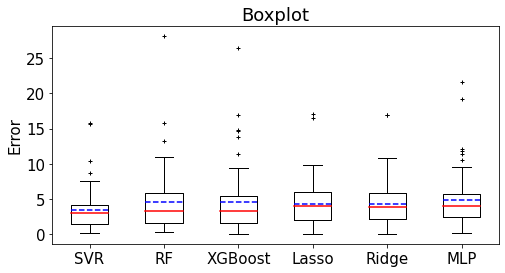

In [197]:
from sklearn.metrics import mean_absolute_error
mae=[1,1,1,1,1,1]
ypred=[svmR_p_,rfR_p_,xbg_r_p_,lasso_p_,ridge_p_,mlp_p_]
for i in range(6):
    mae[i] = np.abs(a-ypred[i])
plt.figure(figsize=[8,4])
label=["SVR","RF","XGBoost","Lasso","Ridge","MLP"]
plt.boxplot(mae,
            medianprops={'color': 'red', 'linewidth': '1.5'},
            meanline=True,
            showmeans=True,
            meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
            flierprops={"marker": "+", "markerfacecolor": "r", "markersize": 4},
            labels=label
            )
plt.title("Boxplot")
plt.ylabel("Error")
#plt.ylim(0, 25)
plt.savefig('Boxplot.png',dpi=600)

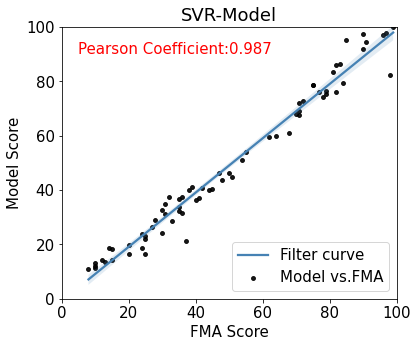

In [191]:
from sklearn.linear_model import LinearRegression
LinearR = LinearRegression().fit(a.reshape(-1,1),svmR_p_)
Y_pred=LinearR.predict(a.reshape(-1,1))

# plt.figure(figsize=[5,5])
# plt.plot(a,Y_pred)
# plt.scatter(a,svmR_p_,s=15,c='g',label='svmR Prediction Score')
from scipy.stats.stats import pearsonr
r, p_value = pearsonr(a, svmR_p_)
newdata=pd.concat([pd.DataFrame(Series(a)),pd.DataFrame(Series(svmR_p_))],axis=1)
newdata.columns=["actual","predict"]
newdata

g=sns.regplot(x="actual",y="predict",data=newdata,scatter_kws={'marker':'o','s':15,'alpha':0.9,"color":"k"}
             ,line_kws={'label': 'Filter curve','color': 'steelblue'},label='Model vs.FMA')
g.figure.set_size_inches(6,5)
plt.legend(loc='lower right')
plt.title("SVR-Model")
plt.xlabel("FMA Score",fontsize=15)
plt.ylabel("Model Score",fontsize=15)
# plt.savefig('totalRIDGE.png',dpi=600)
plt.text(5,90,"Pearson Coefficient:{}".format(np.around(r,3)),color="r")
plt.axis([0,100,0,100])
plt.savefig('SVR-Model_line.png',dpi=600)

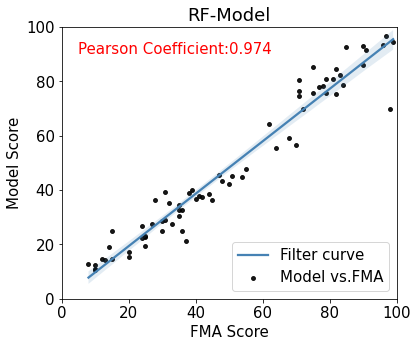

In [192]:
from sklearn.linear_model import LinearRegression
LinearR = LinearRegression().fit(a.reshape(-1,1),rfR_p_)
Y_pred=LinearR.predict(a.reshape(-1,1))
newdata=pd.concat([pd.DataFrame(Series(a)),pd.DataFrame(Series(rfR_p_))],axis=1)
newdata.columns=["actual","predict"]
newdata
g=sns.regplot(x="actual",y="predict",data=newdata,scatter_kws={'marker':'o','s':15,'alpha':0.9,"color":"k"}
             ,line_kws={'label': 'Filter curve','color': 'steelblue'},label='Model vs.FMA')
g.figure.set_size_inches(6,5)
plt.legend(loc='lower right')
from scipy.stats.stats import pearsonr
r, p_value = pearsonr(a, rfR_p_)
plt.title("RF-Model")
plt.xlabel("FMA Score",fontsize=15)
plt.ylabel("Model Score",fontsize=15)
plt.text(5,90,"Pearson Coefficient:{}".format(np.around(r,3)),color="r")
plt.axis([0,100,0,100])
plt.savefig('RF-Model_line.png',dpi=600)

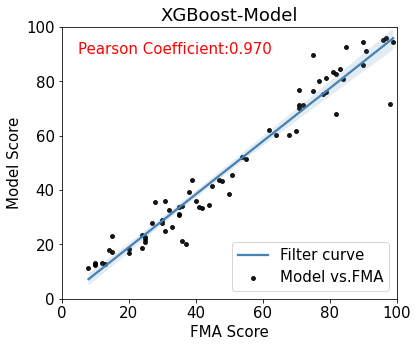

In [193]:
from sklearn.linear_model import LinearRegression
LinearR = LinearRegression().fit(a.reshape(-1,1),xbg_r_p_)
Y_pred=LinearR.predict(a.reshape(-1,1))
# plt.figure(figsize=[5,5])
# plt.plot(a,Y_pred)
# plt.scatter(a,xbg_r_p_,s=15,c='g',label='xbg Prediction Score')
# plt.legend()
from scipy.stats.stats import pearsonr
r, p_value = pearsonr(a, xbg_r_p_)
newdata=pd.concat([pd.DataFrame(Series(a)),pd.DataFrame(Series(xbg_r_p_))],axis=1)
newdata.columns=["actual","predict"]
newdata
g=sns.regplot(x="actual",y="predict",data=newdata,scatter_kws={'marker':'o','s':15,'alpha':0.9,"color":"k"}
             ,line_kws={'label': 'Filter curve','color': 'steelblue'},label='Model vs.FMA')
g.figure.set_size_inches(6,5)
plt.legend(loc='lower right')
plt.title("XGBoost-Model")
plt.xlabel("FMA Score",fontsize=15)
plt.ylabel("Model Score",fontsize=15)
# plt.savefig('totalRIDGE.png',dpi=600)
plt.text(5,90,"Pearson Coefficient:0.970",color="r")
plt.axis([0,100,0,100])
plt.savefig('XGBoost-Model_line.png',dpi=600)

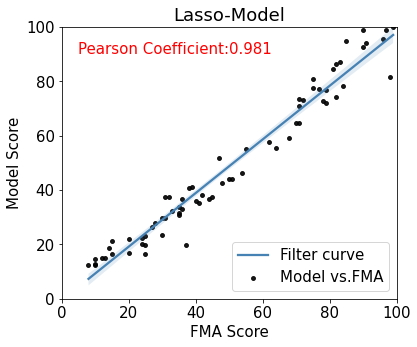

In [194]:
from sklearn.linear_model import LinearRegression
LinearR = LinearRegression().fit(a.reshape(-1,1),lasso_p_)
Y_pred=LinearR.predict(a.reshape(-1,1))

# plt.figure(figsize=[5,5])
# plt.plot(a,Y_pred)
# plt.scatter(a,lasso_p_,s=15,c='g',label='lasso Prediction Score')
# plt.legend()
from scipy.stats.stats import pearsonr
r, p_value = pearsonr(a,lasso_p_)
newdata=pd.concat([pd.DataFrame(Series(a)),pd.DataFrame(Series(lasso_p_))],axis=1)
newdata.columns=["actual","predict"]
newdata
g=sns.regplot(x="actual",y="predict",data=newdata,scatter_kws={'marker':'o','s':15,'alpha':0.9,"color":"k"}
             ,line_kws={'label': 'Filter curve','color': 'steelblue'},label='Model vs.FMA')
g.figure.set_size_inches(6,5)
plt.legend(loc='lower right')
plt.title("Lasso-Model")
plt.xlabel("FMA Score",fontsize=15)
plt.ylabel("Model Score",fontsize=15)
# plt.savefig('totalRIDGE.png',dpi=600)
plt.text(5,90,"Pearson Coefficient:{}".format(np.around(r,3)),color="r")
plt.axis([0,100,0,100])
plt.savefig('Lasso-Model_line.png',dpi=600)


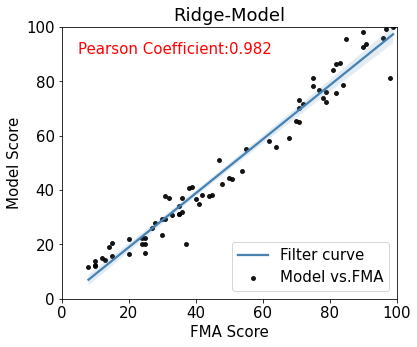

In [195]:
#线性关系图
from sklearn.linear_model import LinearRegression
import seaborn as sns
from pandas import Series
LinearR = LinearRegression().fit(a.reshape(-1,1),ridge_p_)
Y_pred=LinearR.predict(a.reshape(-1,1))
newdata=pd.concat([pd.DataFrame(Series(a)),pd.DataFrame(Series(ridge_p_))],axis=1)
newdata.columns=["actual","predict"]
from scipy.stats.stats import pearsonr
r, p_value = pearsonr(a, ridge_p_)
plt.text(5,90,"Pearson Coefficient:{}".format(np.around(r,3)),color="r")
g=sns.regplot(x="actual",y="predict",data=newdata,scatter_kws={'marker':'o','s':15,'alpha':0.9,"color":"k"}
             ,line_kws={'label': 'Filter curve','color': 'steelblue'},label='Model vs.FMA')
g.figure.set_size_inches(6,5)
plt.legend(loc='lower right')
plt.title("Ridge-Model")
plt.xlabel("FMA Score",fontsize=15)
plt.ylabel("Model Score",fontsize=15)
plt.axis([0,100,0,100])
plt.savefig('Ridge-Model_line.png',dpi=600)

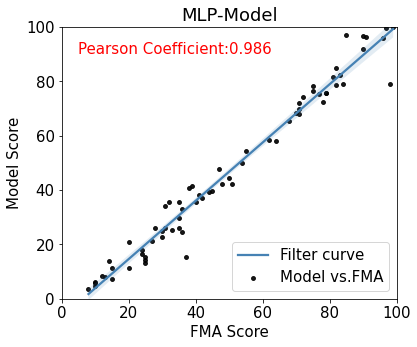

In [196]:
from sklearn.linear_model import LinearRegression
LinearR = LinearRegression().fit(a.reshape(-1,1),mlp_p_)
Y_pred=LinearR.predict(a.reshape(-1,1))

# plt.figure(figsize=[5,5])
# plt.plot(a,Y_pred)
# plt.scatter(a,svmR_p_,s=15,c='g',label='mlp Prediction Score')
# plt.legend()
from scipy.stats.stats import pearsonr
r, p_value = pearsonr(a, mlp_p_)
newdata=pd.concat([pd.DataFrame(Series(a)),pd.DataFrame(Series(mlp_p_))],axis=1)
newdata.columns=["actual","predict"]
newdata
g=sns.regplot(x="actual",y="predict",data=newdata,scatter_kws={'marker':'o','s':15,'alpha':0.9,"color":"k"}
             ,line_kws={'label': 'Filter curve','color': 'steelblue'},label='Model vs.FMA')
g.figure.set_size_inches(6,5)
plt.legend(loc='lower right')
plt.title("MLP-Model")
plt.xlabel("FMA Score",fontsize=15)
plt.ylabel("Model Score",fontsize=15)
# plt.savefig('totalRIDGE.png',dpi=600)
plt.text(5,90,"Pearson Coefficient:{}".format(np.around(r,3)),color="r")
plt.axis([0,100,0,100])
plt.savefig('MLP-Model_line.png',dpi=600)